In [1]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import ipympl
%matplotlib widget

## Evolución de la matriz densidad con la ecuación de Lindblad

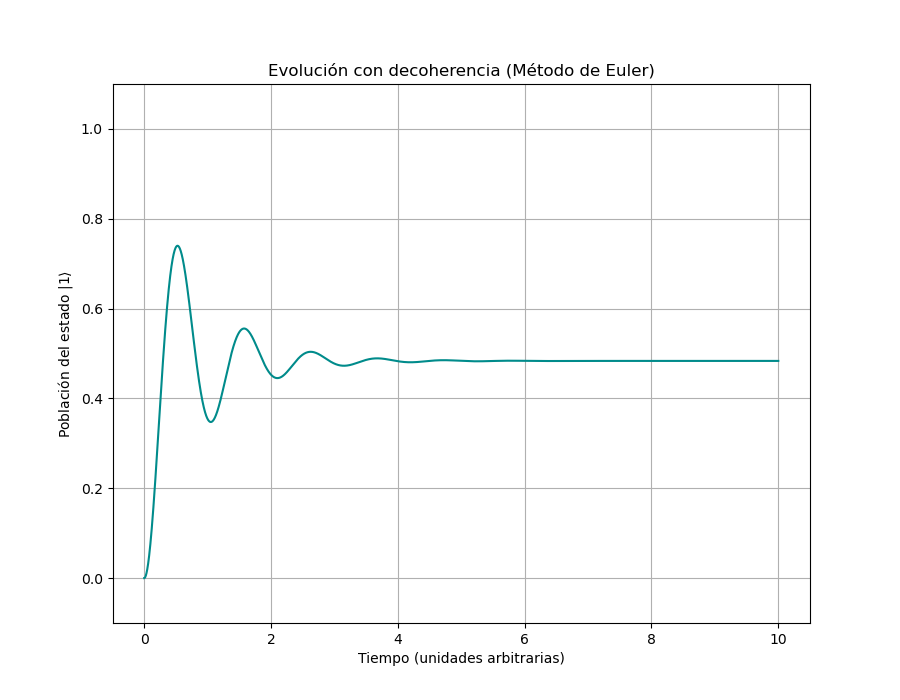

In [3]:
# Definimos los operadores de Pauli
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
sigma_plus = np.array([[0, 0], [1, 0]], dtype=complex)
sigma_minus = np.array([[0, 1], [0, 0]], dtype=complex)

# Definimos los parámetros del sistema
hbar = 1.0545718e-34 / (2 * np.pi)
Delta_q = 0.1
Omega = 6
gamma = 0.7

# Definimos el hamiltoniano
H = (hbar * Delta_q / 2) * sigma_z + (hbar * Omega / 2) * (sigma_plus + sigma_minus)

# Operadores de Lindblad
L1 = sigma_z
L2 = sigma_minus

# Definimos rho en el estado fundamental
rho_initial = np.array([[1, 0], [0, 0]], dtype=complex)

t_points = 10000
t_max = 10
t = np.linspace(0, t_max, t_points)
dt = t[1] - t[0]

# Evolución de la ecuación de Lindblad usando el método de Euler
rho_t = np.zeros((t_points, 2, 2), dtype=complex)
rho_t[0] = rho_initial

for i in range(1, t_points):
    # Derivada temporal de rho
    drho_dt = -1j / hbar * (np.dot(H, rho_t[i - 1]) - np.dot(rho_t[i - 1], H))
    
    # Términos de Lindblad
    lindblad_term_1 = np.dot(L1, np.dot(rho_t[i - 1], np.conj(L1.T))) - 0.5 * (np.dot(np.dot(L1.T, L1), rho_t[i - 1]) + np.dot(rho_t[i - 1], np.dot(L1.T, L1)))
    lindblad_term_2 = np.dot(L2, np.dot(rho_t[i - 1], np.conj(L2.T))) - 0.5 * (np.dot(np.dot(L2.T, L2), rho_t[i - 1]) + np.dot(rho_t[i - 1], np.dot(L2.T, L2)))
    
    # Método de Euler
    rho_t[i] = rho_t[i - 1] + dt * (-1j / hbar * (np.dot(H, rho_t[i - 1]) - np.dot(rho_t[i - 1], H)) + gamma * (lindblad_term_1 + lindblad_term_2))

# Calculamos la probabilidad de ocupación del estado excitado en función del tiempo
excited_state_population = np.abs(rho_t[:, 1, 1])

# Gráfica
plt.figure(figsize=(9, 7))
plt.plot(t, excited_state_population, color='darkcyan')
plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel(r'Población del estado $|1\rangle$')
plt.title('Evolución con decoherencia (Método de Euler)')
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.show()

## Promedio de trayectorias cuánticas

5 trayectorias

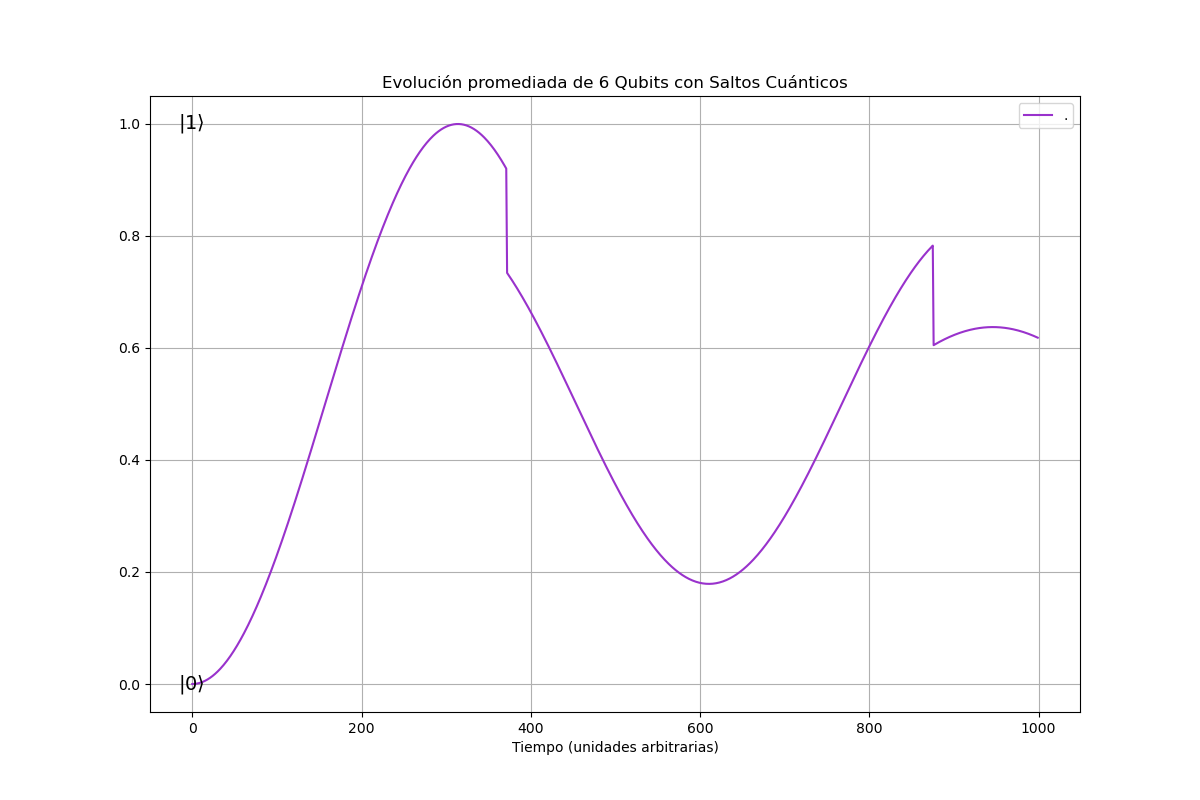

In [16]:
omega = 1.0  # frecuencia de Rabi
gamma = 0.2 
times = np.linspace(0, 10, 1000)
dt = times[1] - times[0]  # dt

# estado inicial 0
psi0 = np.array([1, 0], dtype=np.complex128)

# evolución con el método de saltos cuánticos
def quantum_jump_evolution(omega, gamma, psi0, times):
    dt = times[1] - times[0]
    state = psi0.copy()
    states_over_time = [state.copy()]
    
    for _ in times[:-1]:
        H = omega * np.array([[0, 1], [1, 0]])  # hamiltoniano del ss
        U = np.array([[np.cos(omega * dt/2), -1j*np.sin(omega * dt/2)],
                      [-1j*np.sin(omega * dt/2), np.cos(omega * dt/2)]])  # matriz de evolución (U)
        state = U.dot(state)
        
        # decaimiento
        jump_prob = gamma * np.abs(state[1])**2 * dt
        if np.random.random() < jump_prob:
            state = np.array([1, 0], dtype=np.complex128)  # definimos el salto cuántico al estado 0
        
        # normalizamos
        state /= np.linalg.norm(state)
        states_over_time.append(state.copy())
        
    return np.array(states_over_time)

# múltiples realizaciones
num_realizations = 5
all_trajectories = []

for _ in range(num_realizations):
    states_over_time = quantum_jump_evolution(omega, gamma, psi0, times)
    # probabilidad de estar en el estado 1 en el tiempo
    prob_1 = np.abs(states_over_time[:, 1])**2
    all_trajectories.append(prob_1)

# gráficas
plt.figure(figsize=(12, 8))

plt.plot(np.array(all_trajectories).mean(axis=0), color='darkorchid')



plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel('')
# plt.yticks([]) 
plt.text(-1.3, 0, r'$|0\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.text(-1.3, 1, r'$|1\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.title('Evolución promediada de 6 Qubits con Saltos Cuánticos')
plt.legend(".")
plt.grid()
plt.show()

50 trayectorias

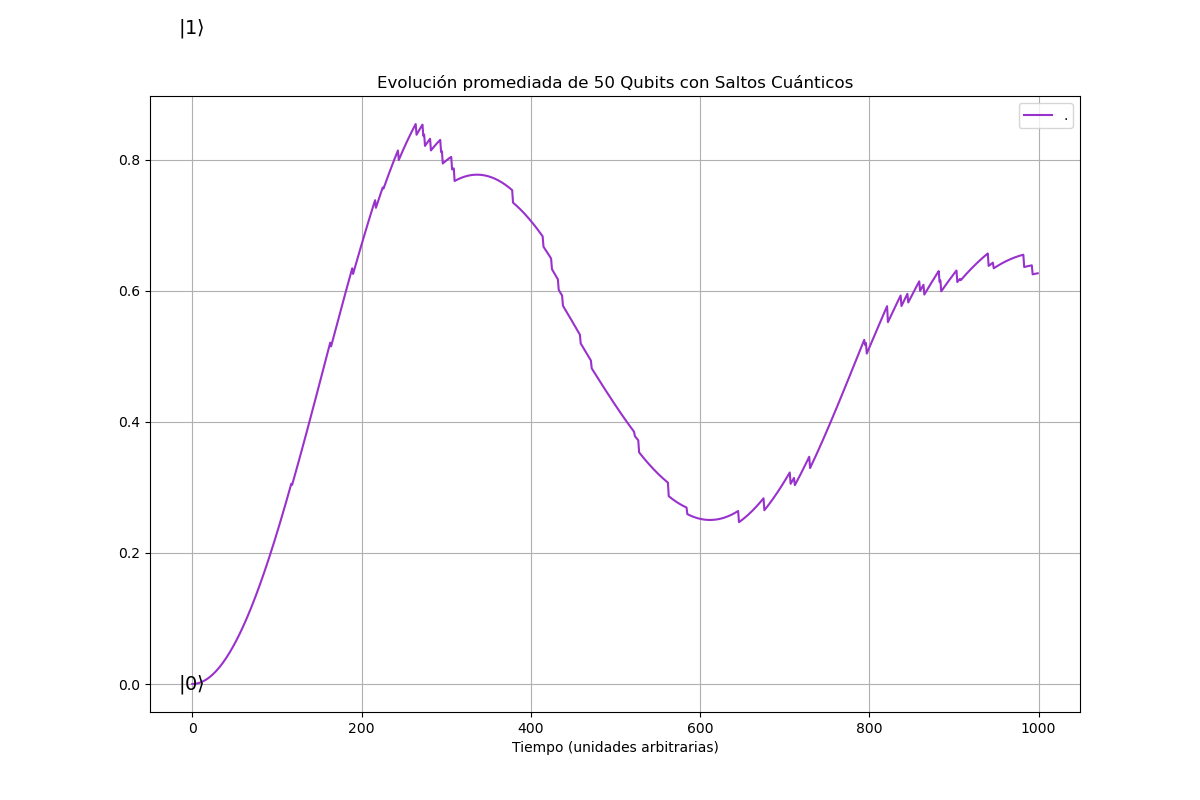

In [17]:
omega = 1.0  # frecuencia de Rabi
gamma = 0.2 
times = np.linspace(0, 10, 1000)
dt = times[1] - times[0]  # dt

# estado inicial 0
psi0 = np.array([1, 0], dtype=np.complex128)

# evolución con el método de saltos cuánticos
def quantum_jump_evolution(omega, gamma, psi0, times):
    dt = times[1] - times[0]
    state = psi0.copy()
    states_over_time = [state.copy()]
    
    for _ in times[:-1]:
        H = omega * np.array([[0, 1], [1, 0]])  # hamiltoniano del ss
        U = np.array([[np.cos(omega * dt/2), -1j*np.sin(omega * dt/2)],
                      [-1j*np.sin(omega * dt/2), np.cos(omega * dt/2)]])  # matriz de evolución (U)
        state = U.dot(state)
        
        # decaimiento
        jump_prob = gamma * np.abs(state[1])**2 * dt
        if np.random.random() < jump_prob:
            state = np.array([1, 0], dtype=np.complex128)  # definimos el salto cuántico al estado 0
        
        # normalizamos
        state /= np.linalg.norm(state)
        states_over_time.append(state.copy())
        
    return np.array(states_over_time)

# múltiples realizaciones
num_realizations = 50
all_trajectories = []

for _ in range(num_realizations):
    states_over_time = quantum_jump_evolution(omega, gamma, psi0, times)
    # probabilidad de estar en el estado 1 en el tiempo
    prob_1 = np.abs(states_over_time[:, 1])**2
    all_trajectories.append(prob_1)

# gráficas
plt.figure(figsize=(12, 8))

plt.plot(np.array(all_trajectories).mean(axis=0), color='darkorchid')



plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel('')
# plt.yticks([]) 
plt.text(-1.3, 0, r'$|0\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.text(-1.3, 1, r'$|1\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.title('Evolución promediada de 50 Qubits con Saltos Cuánticos')
plt.legend(".")
plt.grid()
plt.show()

500 trayectorias

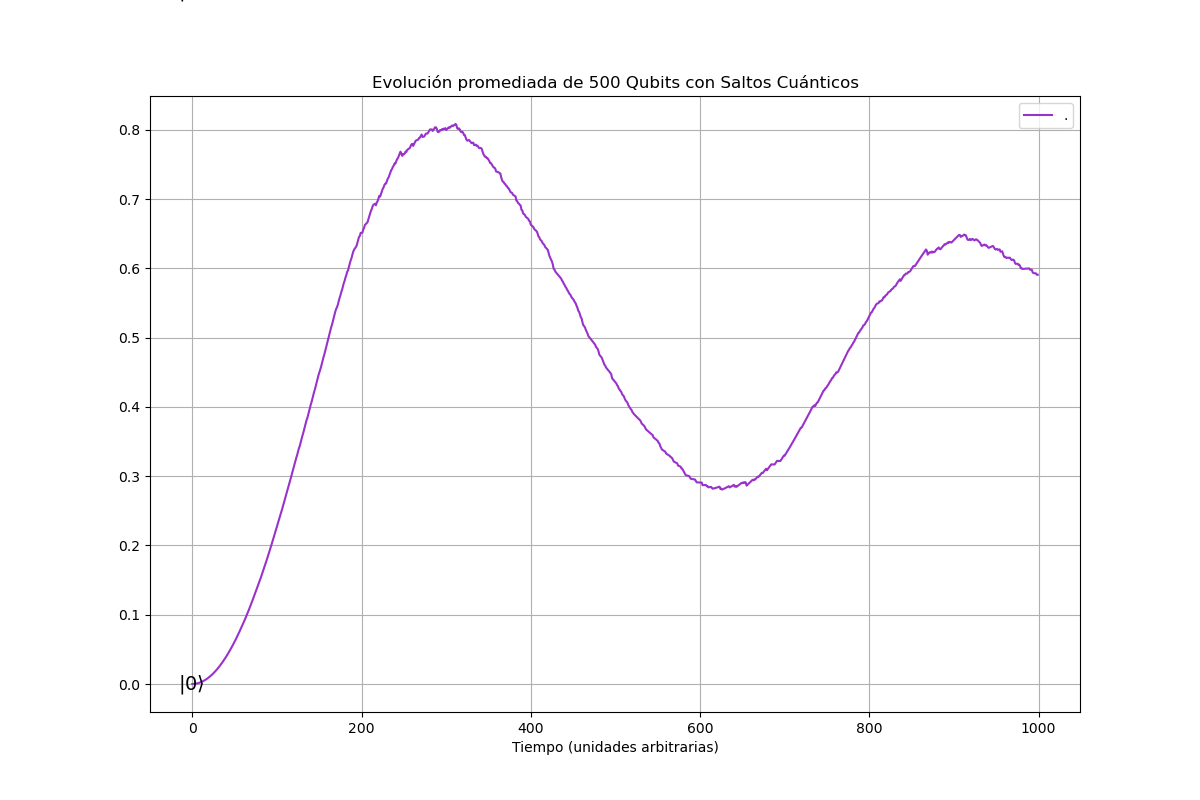

In [18]:
omega = 1.0  # frecuencia de Rabi
gamma = 0.2 
times = np.linspace(0, 10, 1000)
dt = times[1] - times[0]  # dt

# estado inicial 0
psi0 = np.array([1, 0], dtype=np.complex128)

# evolución con el método de saltos cuánticos
def quantum_jump_evolution(omega, gamma, psi0, times):
    dt = times[1] - times[0]
    state = psi0.copy()
    states_over_time = [state.copy()]
    
    for _ in times[:-1]:
        H = omega * np.array([[0, 1], [1, 0]])  # hamiltoniano del ss
        U = np.array([[np.cos(omega * dt/2), -1j*np.sin(omega * dt/2)],
                      [-1j*np.sin(omega * dt/2), np.cos(omega * dt/2)]])  # matriz de evolución (U)
        state = U.dot(state)
        
        # decaimiento
        jump_prob = gamma * np.abs(state[1])**2 * dt
        if np.random.random() < jump_prob:
            state = np.array([1, 0], dtype=np.complex128)  # definimos el salto cuántico al estado 0
        
        # normalizamos
        state /= np.linalg.norm(state)
        states_over_time.append(state.copy())
        
    return np.array(states_over_time)

# múltiples realizaciones
num_realizations = 500
all_trajectories = []

for _ in range(num_realizations):
    states_over_time = quantum_jump_evolution(omega, gamma, psi0, times)
    # probabilidad de estar en el estado 1 en el tiempo
    prob_1 = np.abs(states_over_time[:, 1])**2
    all_trajectories.append(prob_1)

# gráficas
plt.figure(figsize=(12, 8))

plt.plot(np.array(all_trajectories).mean(axis=0), color='darkorchid')



plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel('')
# plt.yticks([]) 
plt.text(-1.3, 0, r'$|0\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.text(-1.3, 1, r'$|1\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.title('Evolución promediada de 500 Qubits con Saltos Cuánticos')
plt.legend(".")
plt.grid()
plt.show()

5000 trayectorias

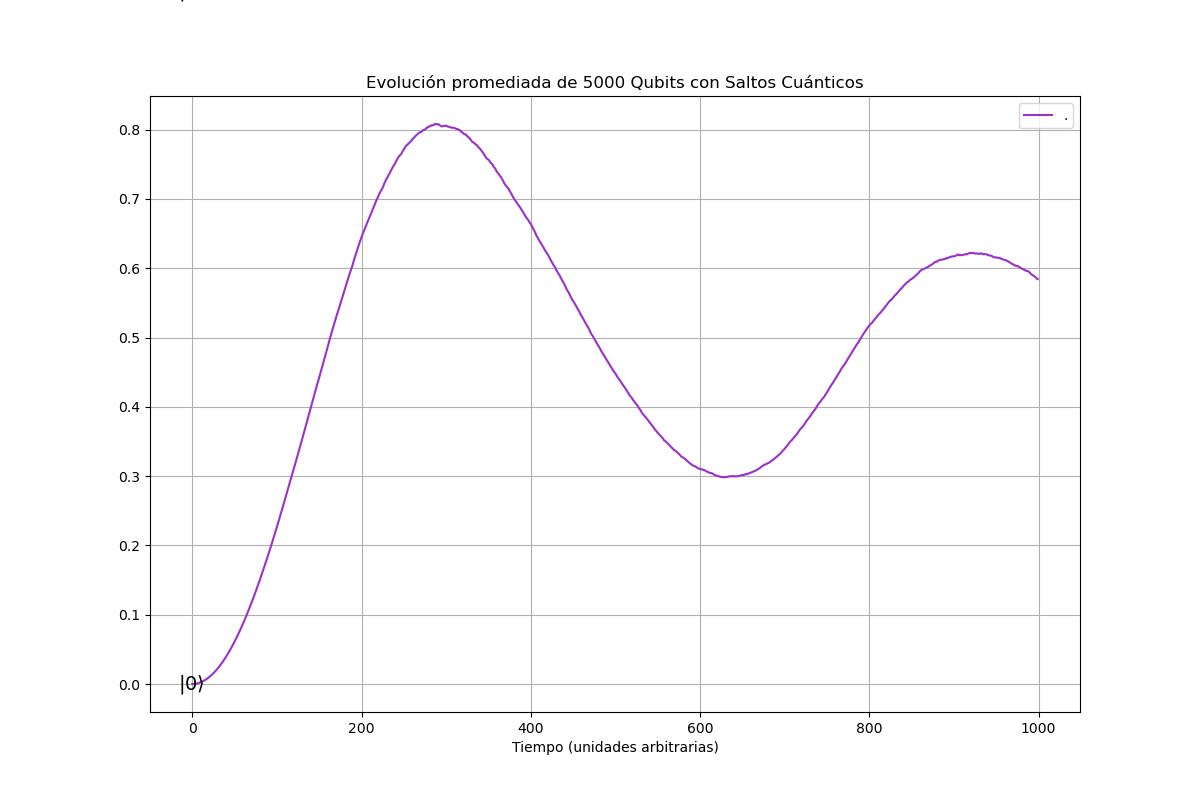

In [19]:
omega = 1.0  # frecuencia de Rabi
gamma = 0.2 
times = np.linspace(0, 10, 1000)
dt = times[1] - times[0]  # dt

# estado inicial 0
psi0 = np.array([1, 0], dtype=np.complex128)

# evolución con el método de saltos cuánticos
def quantum_jump_evolution(omega, gamma, psi0, times):
    dt = times[1] - times[0]
    state = psi0.copy()
    states_over_time = [state.copy()]
    
    for _ in times[:-1]:
        H = omega * np.array([[0, 1], [1, 0]])  # hamiltoniano del ss
        U = np.array([[np.cos(omega * dt/2), -1j*np.sin(omega * dt/2)],
                      [-1j*np.sin(omega * dt/2), np.cos(omega * dt/2)]])  # matriz de evolución (U)
        state = U.dot(state)
        
        # decaimiento
        jump_prob = gamma * np.abs(state[1])**2 * dt
        if np.random.random() < jump_prob:
            state = np.array([1, 0], dtype=np.complex128)  # definimos el salto cuántico al estado 0
        
        # normalizamos
        state /= np.linalg.norm(state)
        states_over_time.append(state.copy())
        
    return np.array(states_over_time)

# múltiples realizaciones
num_realizations = 5000
all_trajectories = []

for _ in range(num_realizations):
    states_over_time = quantum_jump_evolution(omega, gamma, psi0, times)
    # probabilidad de estar en el estado 1 en el tiempo
    prob_1 = np.abs(states_over_time[:, 1])**2
    all_trajectories.append(prob_1)

# gráficas
plt.figure(figsize=(12, 8))

plt.plot(np.array(all_trajectories).mean(axis=0), color='darkorchid')

# for i, trajectory in enumerate(all_trajectories):
#    plt.plot(times, trajectory, label=f'Qubit {i+1}')

plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel('')
# plt.yticks([]) 
plt.text(-1.3, 0, r'$|0\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.text(-1.3, 1, r'$|1\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.title('Evolución promediada de 5000 Qubits con Saltos Cuánticos')
plt.legend(".")
plt.grid()
plt.show()